<a href="https://colab.research.google.com/github/edwinsalazar/AdvDataViz/blob/main/outcome/11%20Pandas%20Data%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/')
for item in os.listdir():
  print(item)
print("--------------")
os.chdir('/content/drive/MyDrive/cloud/GitHub/AdvDataViz/Notebooks/')
for item in os.listdir():
  print(item)
print("--------------")
notebooks = "/content/drive/MyDrive/cloud/GitHub/AdvDataViz/Notebooks"
print(os.listdir(notebooks))
print("--------------")

file = "heart-disease.csv"
file_path = os.path.join(notebooks, file)
with open(file_path, "r") as f:
  contents = f.read()

Mounted at /content/drive
learningStore
healthyCar
startup
cloud
Artificial Intelligence
--------------
03 Matplotlib  - Exercise.ipynb
02 Matplotlib.ipynb
01 Python_Pandas.ipynb
04 Continuous Variables - Histogram .ipynb
05 Continuous Variables - Histogram - Exercise .ipynb
07 Continuous Variables - Boxplot - Exercise .ipynb
03 Matplotlib - Exercise Solutions.ipynb
05 Continuous Variables - Histogram - Exercise Solutions.ipynb
06 Continuous Variables - Boxplot.ipynb
08 Continuous Variables - Scatterplot.ipynb
07 Continuous Variables - Boxplot - Exercise Solutions.ipynb
09 Continuous Variables - Scatterplot - Exercise Solutions.ipynb
09 Continuous Variables - Scatterplot - Exercise .ipynb
10 Categorical Variables - Bar_Pie.ipynb
12 Seaborn.ipynb
11 Pandas Data Visualization.ipynb
13 Seaborn - Exercise .ipynb
Top 50 US Tech Companies.csv
13 Seaborn - Exercise Solution.ipynb
15 Custom Modules.ipynb
14 Functions.ipynb
churn.csv
student_performance.csv
myplotlib.py
employee_attrition_.csv


In [3]:
#df = pd.read_csv("heart-disease.csv")
df = pd.read_csv(file_path)

df.head()

,age,sex,chest_pain,rest_bp,chol,max_hr,st_depr,heart_disease
0,63,female,3,145,233,150,2.3,1
1,37,female,2,130,250,187,3.5,1
2,41,male,1,130,204,172,1.4,1
3,56,female,1,120,236,178,0.8,1
4,57,male,0,120,354,163,0.6,1


---

# Line Plot

## Column

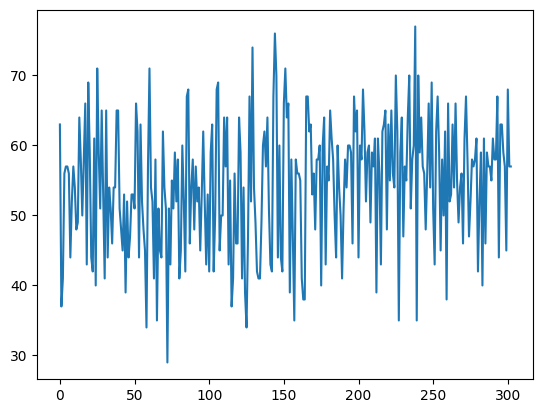

In [21]:
# x-axis defaults to the row's index number

df["age"].plot(kind="line");

### You can set many of the plot's parameters within the plot() method.

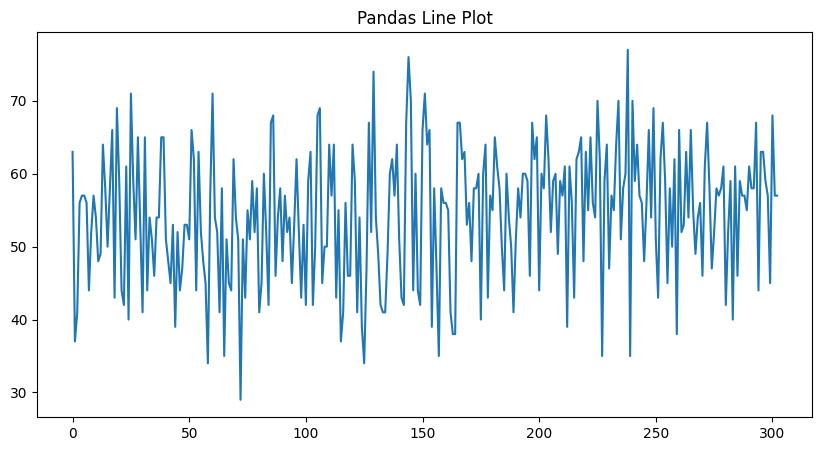

In [6]:
df["age"].plot(kind="line", figsize=(10,5), title="Pandas Line Plot");

### Multiple columns

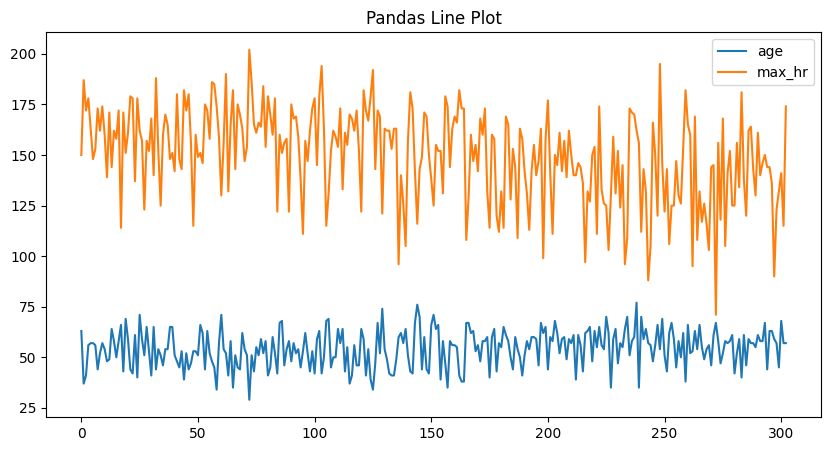

In [7]:
df[["age", "max_hr"]].plot(kind="line", figsize=(10,5), title="Pandas Line Plot");

---

## DataFrame

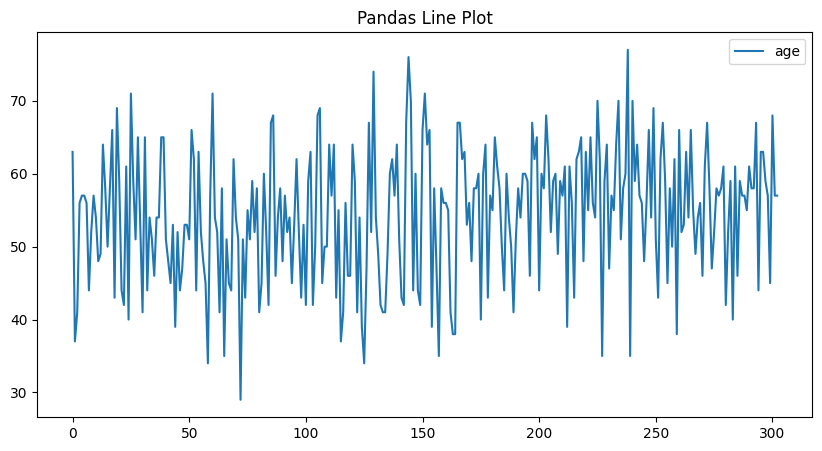

In [8]:
# x-axis defaults to the row's index number

df.plot(y="age", kind="line", figsize=(10,5), title="Pandas Line Plot");

### Multiple columns

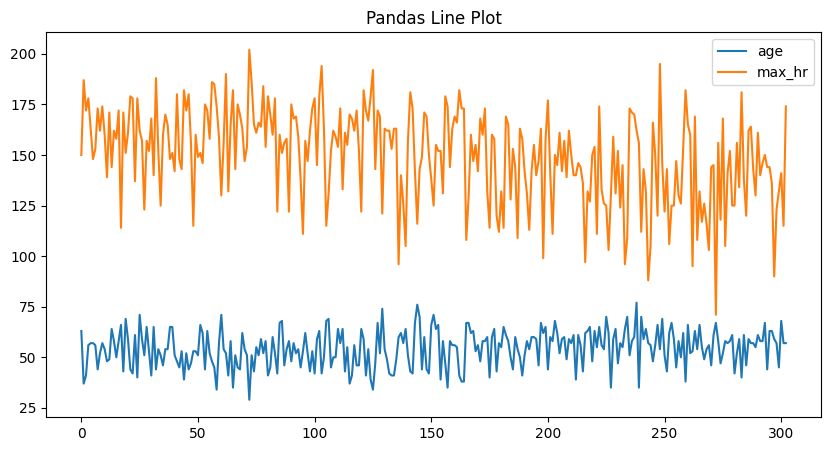

In [9]:
df.plot(y=["age", "max_hr"], kind="line", figsize=(10,5), title="Pandas Line Plot");

### Set a custom style

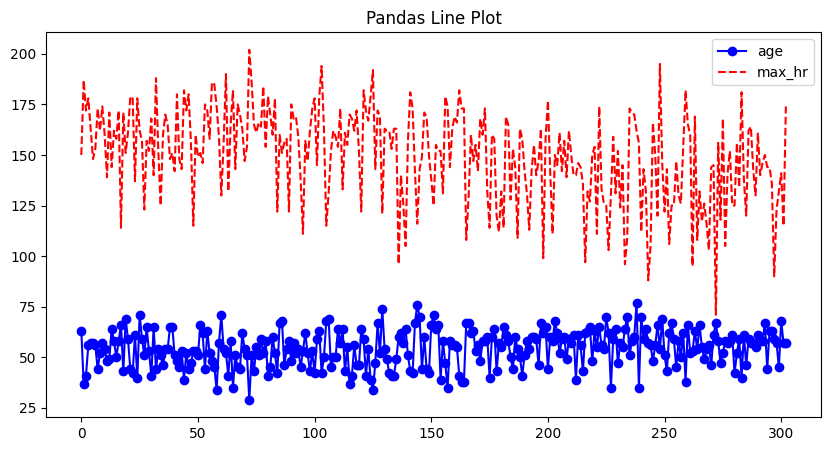

In [10]:
df.plot(kind="line", y=["age", "max_hr"],
             figsize=(10,5), title="Pandas Line Plot",
             style=['b-o', 'r--']); # 'b:', 'r-.'

### Define subplots to render plots in separate axes.

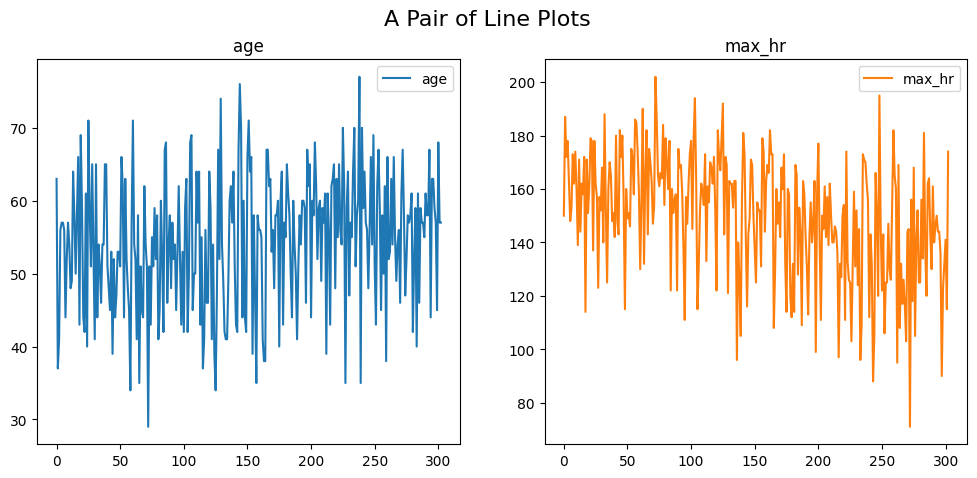

In [11]:
df.plot(kind="line",  y=["age", "max_hr"],
             figsize=(12,5), title=["age", "max_hr"],
             subplots=True, layout=(1,2))

# Set the title of the whole figure
plt.suptitle("A Pair of Line Plots", fontsize=16);

---

# Histogram

## Column

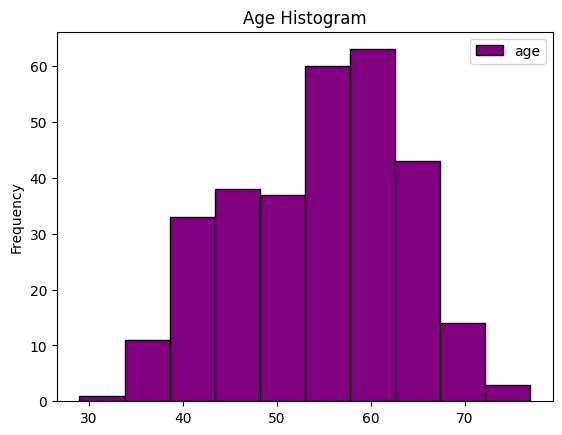

In [12]:
# Set legend=True to display a legend (defaults to False when plotting from a column)

df["age"].plot(kind="hist", color="purple",
               edgecolor='black', title="Age Histogram", legend=True);

## DataFrame

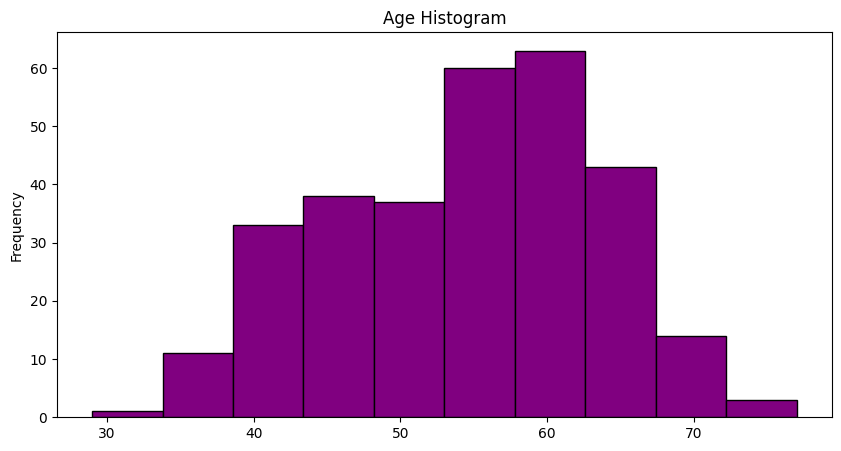

In [13]:
# Set legend=False to not display a legend (defaults to True when plotting from a DataFrame)

df.plot(y="age", kind="hist", color="purple",
        edgecolor='black', title="Age Histogram", figsize=(10, 5), legend=False);

---

# Bar Plot

### Categorical variable

In [14]:
df["chest_pain"].value_counts()

,count
chest_pain,
0,143
2,87
1,50
3,23


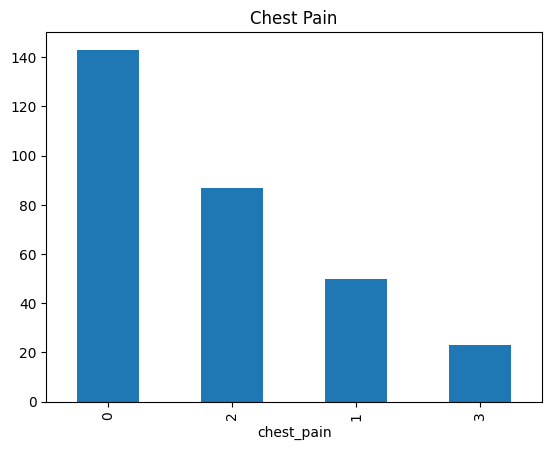

In [15]:
df["chest_pain"].value_counts().plot(kind="bar", title="Chest Pain");

### Rotate the ticks and increase font size

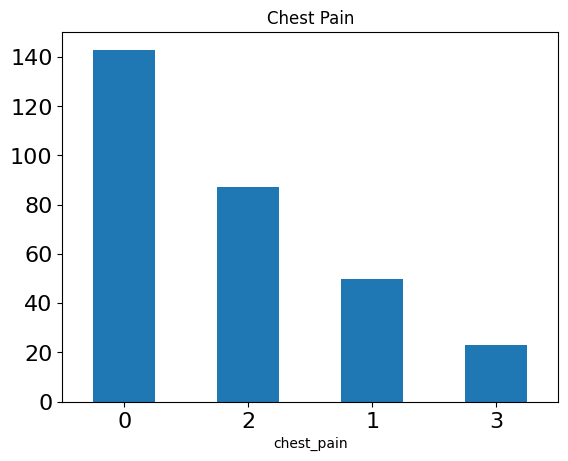

In [16]:
df["chest_pain"].value_counts().plot(kind="bar", title="Chest Pain",
                                 rot="horizontal", fontsize=16);

### Sort in ascending order

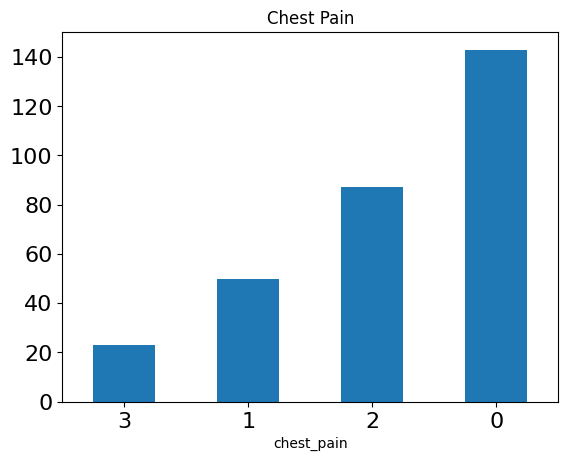

In [17]:
                            # Set ascending to True
df["chest_pain"].value_counts(ascending=True).plot(kind="bar", title="Chest Pain",
                                 rot="horizontal", fontsize=16);

### Display in order of index position

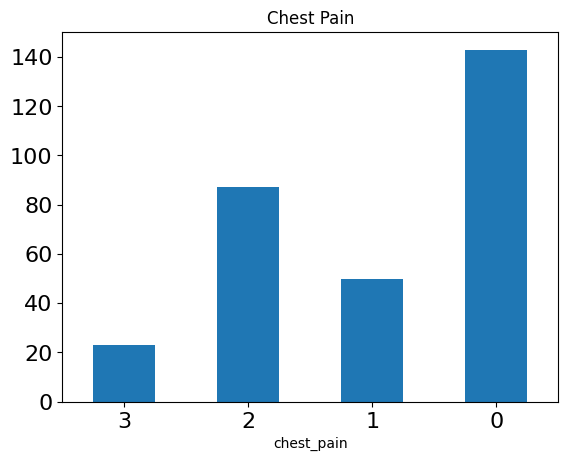

In [18]:
                          # Set sort to False
df["chest_pain"].value_counts(sort=False).plot(kind="bar", title="Chest Pain",
                                 rot="horizontal", fontsize=16);

## Horizontal bar plot

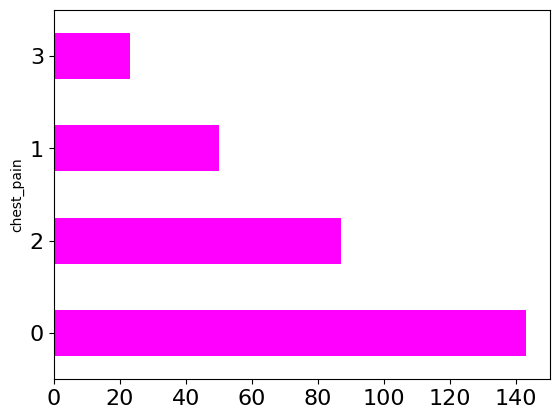

In [22]:
df["chest_pain"].value_counts().plot(kind="barh", color="magenta", fontsize=16);

---

# Joint: categorical x aggregated continuous variable

## Groupby and Aggregate
Group by a categorical variable and aggregate over a continuous variable

In [23]:
df.head()

,age,sex,chest_pain,rest_bp,chol,max_hr,st_depr,heart_disease
0,63,female,3,145,233,150,2.3,1
1,37,female,2,130,250,187,3.5,1
2,41,male,1,130,204,172,1.4,1
3,56,female,1,120,236,178,0.8,1
4,57,male,0,120,354,163,0.6,1


### groupby()

In [24]:
# 1 categorical variable and 3 continuous variables
# Get the mean value of the continuous variables for each category of the categorical variable

   # Categorical    # Continuous variables
df[["chest_pain", "rest_bp", "max_hr", "age"]].groupby(["chest_pain"]).mean()

,rest_bp,max_hr,age
chest_pain,,,
0,132.020979,140.538462,55.692308
1,128.400000,162.420000,51.360000
2,130.379310,155.609195,53.517241
3,140.869565,155.956522,55.869565


### Bar plot

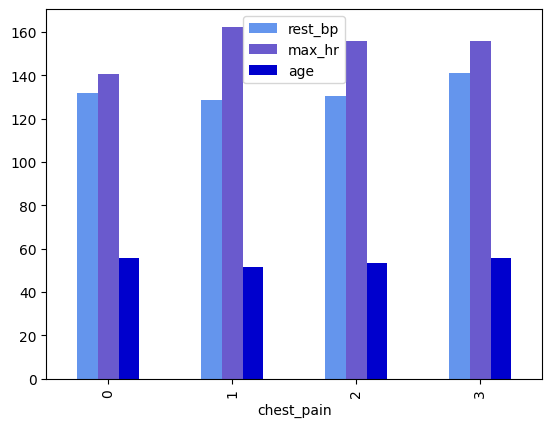

In [25]:
colors=["cornflowerblue", "slateblue", "mediumblue"]

   # Categorical    # Continuous variables
df[["chest_pain", "rest_bp", "max_hr", "age"]].groupby(["chest_pain"]).mean().plot(kind="bar", color=colors);

### Stacked bar plot

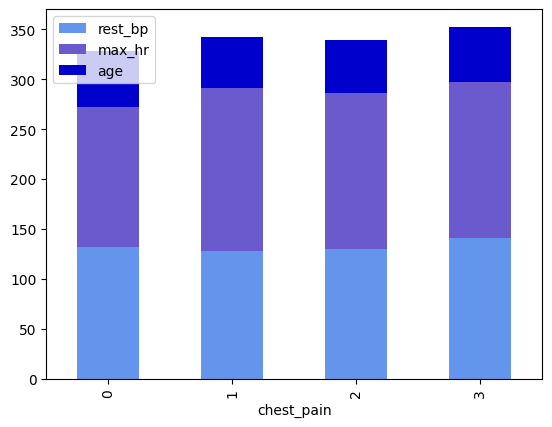

In [26]:
colors=["cornflowerblue", "slateblue", "mediumblue"]

   # Categorical    # Continuous variables
df[["chest_pain", "rest_bp", "max_hr", "age"]].groupby(["chest_pain"]).mean().plot(kind="bar",
                                                                                   color=colors, stacked=True);

### Relocate the legend

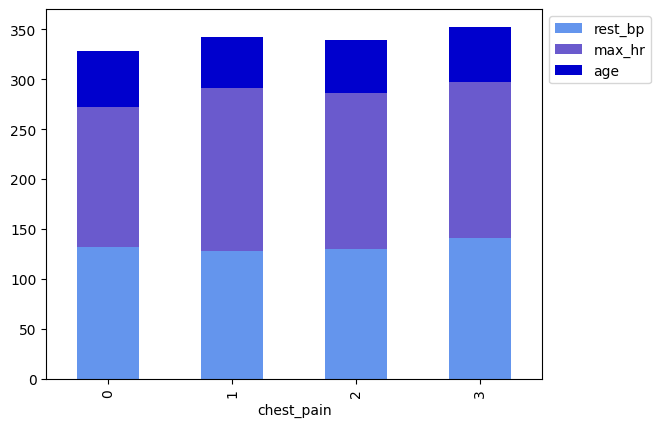

In [27]:
colors=["cornflowerblue", "slateblue", "mediumblue"]

   # Categorical    # Continuous variables
df[["chest_pain", "rest_bp", "max_hr", "age"]].groupby(["chest_pain"]).mean().plot(kind="bar",
                                                                                   color=colors, stacked=True);

# Display a legend (just outside of the plot; up 1, and over to the right 1)
plt.legend(bbox_to_anchor=(1, 1));

---

# Box Plot

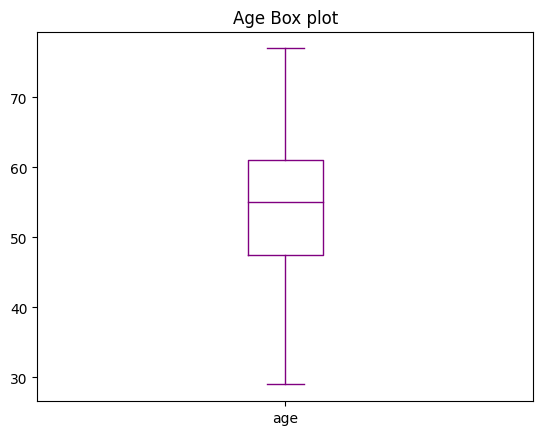

In [28]:
df.plot( y="age", kind="box", color="purple", title="Age Box plot");

---

# Scatter Plot

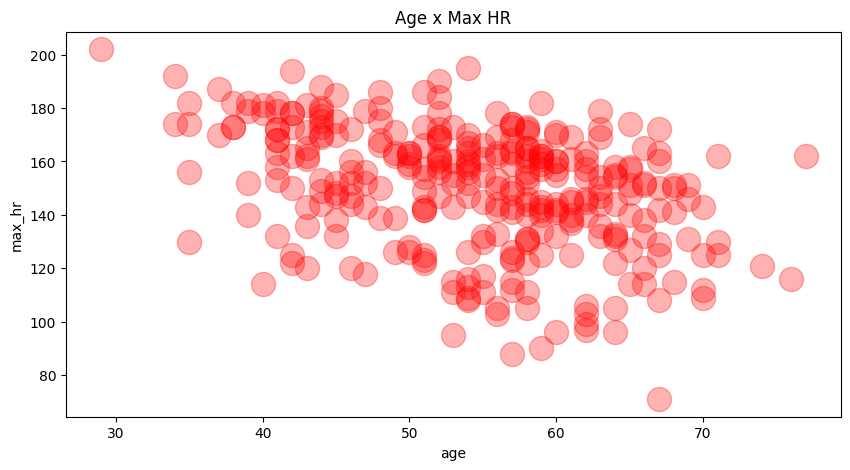

In [29]:
df.plot(kind="scatter", x="age", y="max_hr", title="Age x Max HR",
        s=300, color="red", alpha=.3, figsize=(10, 5));

---